In [1]:
%config InlineBackend.figure_format = "retina"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


## Splitting

Split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
print(class_names[y_train[0]])

Coat


## Preview

In [7]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


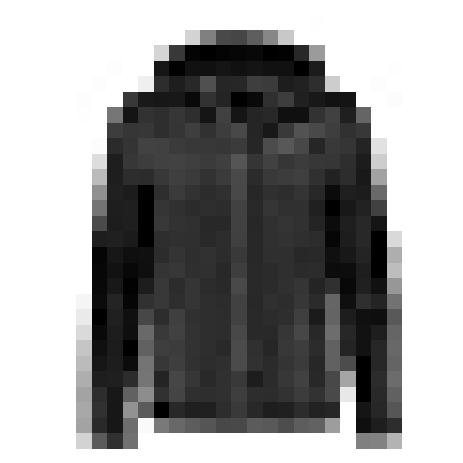

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

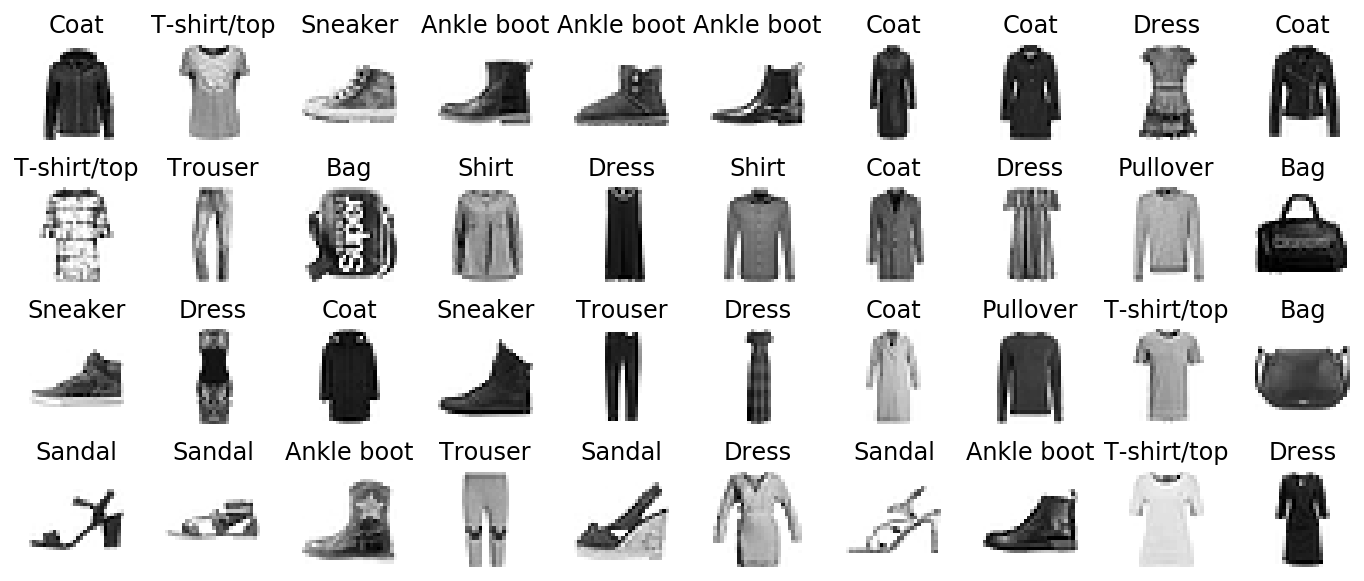

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Creating the Model Using the Sequential API

In [10]:
model = keras.models.Sequential()
# It is a Flatten layer whose role is simply to convert each input image into a 1D array
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# Equal to model.add(InputLayer(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Set random seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Instead
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
print(model.layers)
print(model.layers[2].name)
print(model.get_layer('dense_2').name)

[<tensorflow.python.keras.layers.core.Flatten object at 0x63e6af410>, <tensorflow.python.keras.layers.core.Dense object at 0x63e6a2810>, <tensorflow.python.keras.layers.core.Dense object at 0x63f04c890>, <tensorflow.python.keras.layers.core.Dense object at 0x65f342e90>]
dense_1
dense_2


All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` method.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

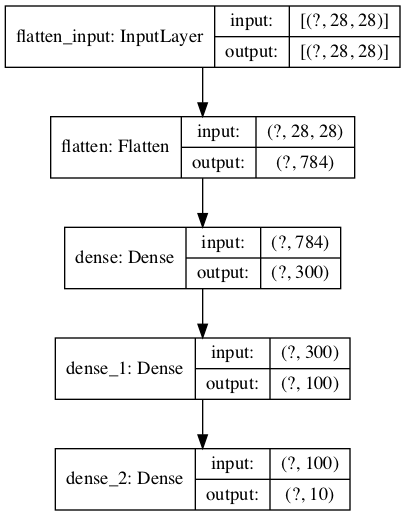

In [13]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [14]:
# Acquire object
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
weights, biases = hidden1.get_weights()

In [16]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


Dense layer initialized the connection weights randomly (which is needed to break symmetry, as we discussed earlier), and the biases were just initialized to zeros, which is fine. If you ever want to use a different initialization method, you can set `kernel_initializer` (kernel is another name for the matrix of connection weights) or `bias_initializer` when creating the layer.

## Compiling

In [17]:
# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="sgd",
#               metrics=["accuracy"])

# Instead
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [18]:
# conda install nomkl
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.7228 - sparse_categorical_accuracy: 0.7622 - val_loss: 0.5310 - val_sparse_categorical_accuracy: 0.8148
Epoch 2/30
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4838 - sparse_categorical_accuracy: 0.8323 - val_loss: 0.4496 - val_sparse_categorical_accuracy: 0.8450
Epoch 3/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4379 - sparse_categorical_accuracy: 0.8473 - val_loss: 0.4178 - val_sparse_categorical_accuracy: 0.8556
Epoch 4/30
55000/55000 [==============================] - 7s 122us/sample - loss: 0.4127 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.3899 - val_sparse_categorical_accuracy: 0.8654
Epoch 5/30
55000/55000 [==============================] - 7s 123us/sample - loss: 0.3929 - sparse_categorical_accuracy: 0.8625 - val_loss: 0.3971 - val_sparse_categorical_accuracy: 0.8614
Epoch 6/30


In [ ]:
# save model
model.save("my_keras_model.h5")
# load model
model = keras.models.load_model("my_keras_model.h5")

# weights
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

In [19]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy']}

In [20]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

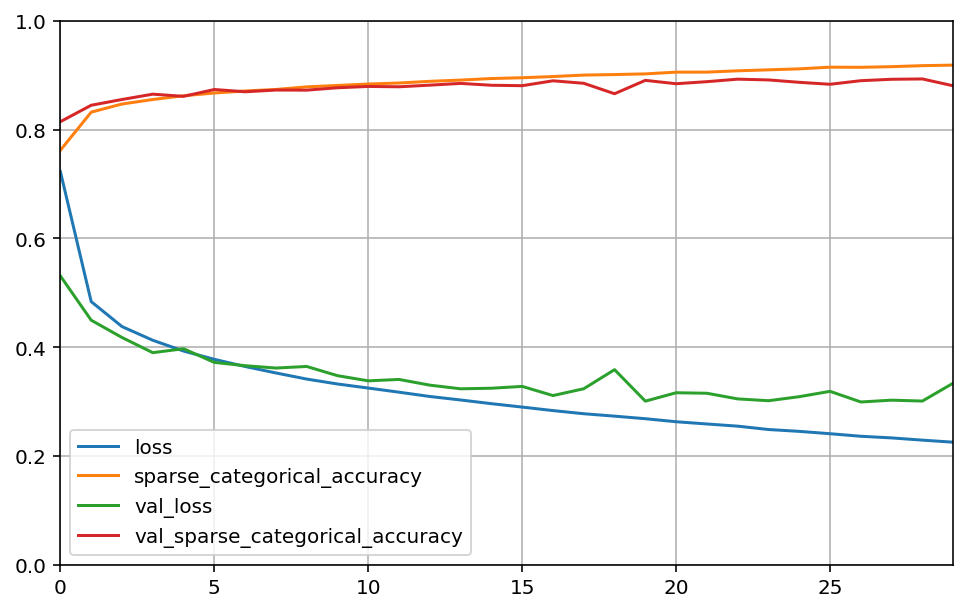

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Using the Model to Make Predictions

#### Probability per class

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

#### Highest estimated probability

In [24]:
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


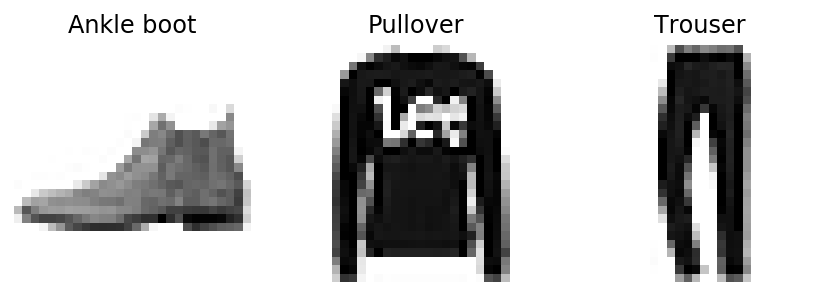

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Using Callbacks and TensorBoard

In [21]:
import os
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir

'logs/fit/20200130-174235'

In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.7228 - sparse_categorical_accuracy: 0.7622 - val_loss: 0.5310 - val_sparse_categorical_accuracy: 0.8148
Epoch 2/30
55000/55000 [==============================] - 7s 122us/sample - loss: 0.4838 - sparse_categorical_accuracy: 0.8323 - val_loss: 0.4496 - val_sparse_categorical_accuracy: 0.8450
Epoch 3/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.4379 - sparse_categorical_accuracy: 0.8473 - val_loss: 0.4178 - val_sparse_categorical_accuracy: 0.8556
Epoch 4/30
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4127 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.3899 - val_sparse_categorical_accuracy: 0.8654
Epoch 5/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.3929 - sparse_categorical_accuracy: 0.8625 - val_loss: 0.3971 - val_sparse_categorical_accuracy: 0.8614
Epoch 6/30


In [25]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1151), started 0:02:04 ago. (Use '!kill 1151' to kill it.)